In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import time
from tqdm import tqdm

from IPython import display


In [ ]:
data = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\Counties35-45_041018.csv')

In [ ]:
data.columns
#5800 cubic feet of gas is 1 boe

In [ ]:
#D2 = data[['APINO', 'YR','JAN_OIL','FEB_OIL', 'MAR_OIL','APR_OIL', 'MAY_OIL','JUN_OIL', 'JUL_OIL','AUG_OIL','SEP_OIL','OCT_OIL',
      #'NOV_OIL','DEC_OIL']]
#D2 = data[['APINO', 'YR','JAN_GAS','FEB_GAS', 'MAR_GAS','APR_GAS', 'MAY_GAS','JUN_GAS', 'JUL_GAS','AUG_GAS','SEP_GAS','OCT_GAS',
      #'NOV_GAS','DEC_GAS']]
D2 = data[['APINO', 'YR','JAN_WATER','FEB_WATER', 'MAR_WATER','APR_WATER', 'MAY_WATER','JUN_WATER', 'JUL_WATER','AUG_WATER',
           'SEP_WATER','OCT_WATER', 'NOV_WATER','DEC_WATER']]

In [ ]:
masterDF = pd.DataFrame()
dfList = []
APIS = []
for well in D2.APINO.unique()[0:]:
    d3 = D2[D2['APINO'] == well][['JAN_WATER','FEB_WATER', 'MAR_WATER','APR_WATER', 'MAY_WATER','JUN_WATER', 'JUL_WATER','AUG_WATER',
           'SEP_WATER','OCT_WATER', 'NOV_WATER','DEC_WATER']].stack()
    #print(str(D2[D2['APINO'] == well].YR.min()))
    ind = pd.date_range(str(D2[D2['APINO'] == well].YR.min()), periods=len(D2[D2['APINO'] == well])*12, freq='M')
    ts = pd.Series(d3.values, index=ind)
    dfList.append(ts.to_frame(name=str(well)))
    APIS.append(well)
    #masterDF = pd.concat([masterDF, ts.to_frame(name=str(well))])
masterDF =  pd.concat(dfList, axis=1)

In [ ]:
masterDF = pd.concat(dfList, axis=1).fillna(0)

In [ ]:
well_locs = pd.read_csv(r'd:\wells.csv')

In [ ]:
coords = []
for well in APIS:
    coords.append(well_locs[well_locs['APINO'] == well][['latitude', 'longitude']].values)

In [ ]:
for i in tqdm(range(484)):
    plt.clf()
    plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=200*(masterDF.iloc[i].values/np.max(np.max(masterDF))),
                alpha=0.5, c='g')
    display.clear_output(wait=True)
    time.sleep(0.01)
    plt.xlim(np.max(np.vstack(coords)[0:,1]),np.min(np.vstack(coords)[0:,1]))
    plt.ylim(np.min(np.vstack(coords)[0:,0]),np.max(np.vstack(coords)[0:,0]))
    plt.title(masterDF.index[i])
    plt.savefig('D:/fun/'+str(i)+'.png')

In [ ]:
masterDF.iloc[0:484,0:].to_csv('C:\\Users\\jesse.pisel\\Downloads\\TTL_Prod041018\\35to45ts_water.csv')

# Now let's visualized the cleaned data

In [2]:
ts1 = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\1to5ts.csv', index_col=[0])
ts2 = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\7to17ts.csv', index_col=[0])
ts3 = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\19to33ts.csv', index_col=[0])
ts4 = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\35to45ts.csv', index_col=[0])

In [3]:
bigTSoil = pd.concat([ts1, ts2, ts3, ts4], axis=1)

In [4]:
APIS = bigTSoil.columns.values
type(APIS)

numpy.ndarray

In [5]:
well_locs = pd.read_csv(r'd:\wells.csv')
coords = []
for well in APIS:
    coords.append(well_locs[well_locs['APINO'] == int(well)][['latitude', 'longitude']].values)

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
ts1g = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\1to5ts_gas.csv', index_col=[0])
ts2g = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\7to17ts_gas.csv', index_col=[0])
ts3g = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\19to33ts_gas.csv', index_col=[0])
ts4g = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\35to45ts_gas.csv', index_col=[0])
bigTSgas = pd.concat([ts1g, ts2g, ts3g, ts4g], axis=1)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.97s/it]


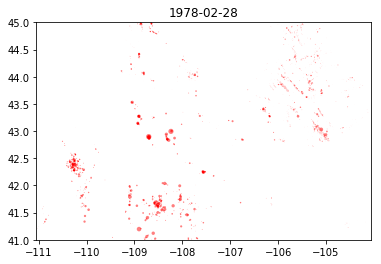

In [8]:
for i in tqdm(range(2)):
    plt.clf()
    plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=200*(bigTSgas.iloc[i].values/np.max(np.max(bigTSgas))),
                alpha=0.5, c='r', linewidths=0)
    display.clear_output(wait=True)
    time.sleep(0.01)
    plt.xlim(np.min(np.vstack(coords)[0:,1]), np.max(np.vstack(coords)[0:,1]))
    plt.ylim(np.min(np.vstack(coords)[0:,0]),np.max(np.vstack(coords)[0:,0]))
    plt.title(bigTSgas.index[i])

In [12]:
ts1w = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\1to5ts_water.csv', index_col=[0])
ts2w = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\7to17ts_water.csv', index_col=[0])
ts3w = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\19to33ts_water.csv', index_col=[0])
ts4w = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\35to45ts_water.csv', index_col=[0])
bigTSwater = pd.concat([ts1w, ts2w, ts3w, ts4w], axis=1)

In [ ]:
for i in tqdm(range(2)):
    plt.clf()
    plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=200*(bigTSwater.iloc[i].values/np.max(np.max(bigTSwater))),
                alpha=0.2, c='b', linewidths=0)
    display.clear_output(wait=True)
    time.sleep(0.01)
    plt.xlim(np.min(np.vstack(coords)[0:,1]), np.max(np.vstack(coords)[0:,1]))
    plt.ylim(np.min(np.vstack(coords)[0:,0]),np.max(np.vstack(coords)[0:,0]))
    plt.title(bigTSwater.index[i])
import mplleaflet
mplleaflet.display()

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.14s/it]


100%|████████████████████████████████████████████████████████████████████████████████| 484/484 [57:21<00:00,  7.11s/it]


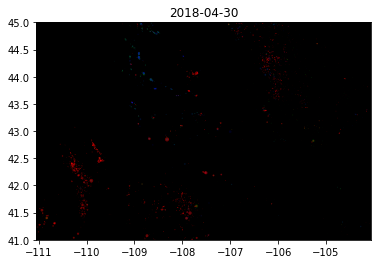

In [62]:
for i in tqdm(range(484)):
    plt.rcParams['axes.facecolor'] = 'black'
    plt.clf()
    plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=200*(bigTSoil.iloc[i].values/np.max(np.max(bigTSoil))),
                alpha=0.4, c='g', linewidths=0)
    plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=200*(bigTSgas.iloc[i].values/np.max(np.max(bigTSgas))),
                alpha=0.4, c='r', linewidths=0)
    plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=200*(bigTSwater.iloc[i].values/np.max(np.max(bigTSwater))),
                alpha=0.1, c='b', linewidths=0)
    display.clear_output(wait=True)
    plt.xlim(np.min(np.vstack(coords)[0:,1]), np.max(np.vstack(coords)[0:,1]))
    plt.ylim(np.min(np.vstack(coords)[0:,0]),np.max(np.vstack(coords)[0:,0]))
    plt.title(bigTSwater.index[i])
    
    plt.savefig('D:/fun/ongw'+str(i)+'.png', dpi=250)

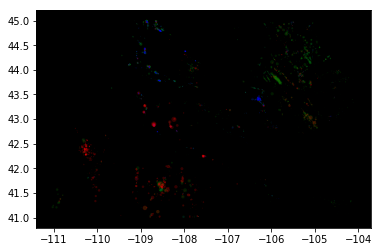

In [59]:
plt.rcParams['axes.facecolor'] = 'black'
plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=200*(bigTSoil.iloc[i].values/np.max(np.max(bigTSoil))),
                alpha=0.2, c='g', linewidths=0)
plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=200*(bigTSgas.iloc[i].values/np.max(np.max(bigTSgas))),
                alpha=0.2, c='r', linewidths=0)
plt.scatter(np.vstack(coords)[0:,1], np.vstack(coords)[0:,0], s=200*(bigTSwater.iloc[i].values/np.max(np.max(bigTSwater))),
                alpha=0.1, c='b', linewidths=0)
